# Scrapping data from the website: https://www.airlinequality.com/ and saved as CSV file

import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

## Initialize Selenium WebDriver
driver = webdriver.Chrome()  # Update path if needed for your ChromeDriver
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

## Data storage
data = []

### Scraping function for a single page
def scrape_page(page_num):
    """Scrape reviews from a single page."""
    url = f"{base_url}/page/{page_num}/"
    driver.get(url)
    print(f"Scraping page {page_num}...")
    
    try:
        # Wait for reviews to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article[itemprop='review']"))
        )
    except Exception as e:
        print(f"Error loading page {page_num}: {e}")
        return []

    # Parse page content
    soup = BeautifulSoup(driver.page_source, "html.parser")
    reviews = soup.find_all("article", itemprop="review")
    if not reviews:
        print(f"No reviews found on page {page_num}.")
        return []

    page_data = []
    for review in reviews:
        try:
            title = review.find("h2", class_="text_header").text.strip()
        except AttributeError:
            title = None

        try:
            author = review.find("span", itemprop="name").text.strip()
        except AttributeError:
            author = None

        try:
            date_published = review.find("time", itemprop="datePublished")["datetime"]
        except (AttributeError, KeyError):
            date_published = None

        try:
            content = review.find("div", class_="text_content").text.strip()
        except AttributeError:
            content = None

        try:
            rating = review.find("span", itemprop="ratingValue").text.strip()
        except AttributeError:
            rating = None

        try:
            route = review.find("td", class_="review-value", text="Route").find_next_sibling("td").text.strip()
        except AttributeError:
            route = None

        page_data.append({
            "Title": title,
            "Author": author,
            "Date Published": date_published,
            "Content": content,
            "Rating": rating,
            "Route": route,
        })
    return page_data

## Main function to scrape all pages
def scrape_all_reviews(total_pages):
    """Scrape reviews across all pages."""
    global data
    try:
        for page_num in range(1, total_pages + 1):
            page_data = scrape_page(page_num)
            if page_data:
                data.extend(page_data)
            
            # Save progress every 10 pages
            if page_num % 10 == 0:
                pd.DataFrame(data).to_csv("scraped_reviews_progress.csv", index=False)
                print(f"Progress saved after page {page_num}.")
            
            # Optional: Add delay to avoid overloading the server
            time.sleep(2)
    except KeyboardInterrupt:
        print("Scraping interrupted by user. Saving progress...")
        pd.DataFrame(data).to_csv("scraped_reviews_interrupted.csv", index=False)
    except Exception as e:
        print(f"Unexpected error: {e}. Saving progress...")
        pd.DataFrame(data).to_csv("scraped_reviews_error.csv", index=False)
    finally:
        # Save the final dataset
        pd.DataFrame(data).to_csv("scraped_reviews_final.csv", index=False)
        print("Final dataset saved.")

### Number of pages to scrape
total_pages = 392

### Start scraping
scrape_all_reviews(total_pages)

### Close the WebDriver
driver.quit()


In [1]:
# Importing Relevant Libraries

import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('punkt_tab')
#nltk.download('vader_lexicon')
#!pip install nltk matplotlib scikit-learn
#!pip install wordcloud
#!pip install textblob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [5]:
## Loading the scraped data
df = pd.read_csv('scraped_reviews_final.csv')
df

,Title,Author,Date Published,Content,Rating,Route
0,"""Very good flight""",Guy Senior,2025-01-20,Not Verified | Very good flight following an ...,9.0,NaN
1,"""relatively comfortable elderly plane""",Simon Channon,2025-01-19,Not Verified | An hour's delay due to late ar...,7.0,NaN
2,"""70 days chasing BA’s complaints department""",R Layne,2025-01-15,✅ Trip Verified | I booked through BA becaus...,1.0,NaN
3,"""BA refused to reimburse me""",Michael Chastain,2025-01-09,✅ Trip Verified | British airways lost bags ...,1.0,NaN
4,"""the flight was delayed""",S Herron,2025-01-05,✅ Trip Verified | The check in process and rew...,1.0,NaN
...,...,...,...,...,...,...
3906,British Airways customer review,J Robertson,2012-08-29,This was a bmi Regional operated flight on a R...,1.0,NaN
3907,British Airways customer review,Nick Berry,2012-08-28,LHR to HAM. Purser addresses all club passenge...,9.0,NaN
3908,British Airways customer review,Avril Barclay,2011-10-12,My son who had worked for British Airways urge...,5.0,NaN
3909,British Airways customer review,C Volz,2011-10-11,London City-New York JFK via Shannon on A318 b...,4.0,NaN


### Remove HTML Tags

Data contains HTML tags (common in web scraping), use libraries like BeautifulSoup or regex to remove them.

In [8]:
def remove_html_tags(text):
    if isinstance(text, str):  # Ensure the value is a string
        return BeautifulSoup(text, "html.parser").get_text()
    return text  # Return non-string values as-is

# Apply the function to all columns in the DataFrame
df = df.applymap(remove_html_tags)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\556724110.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_html_tags)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\556724110.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


,Title,Author,Date Published,Content,Rating,Route
0,"""Very good flight""",Guy Senior,2025-01-20,Not Verified | Very good flight following an ...,9.0,NaN
1,"""relatively comfortable elderly plane""",Simon Channon,2025-01-19,Not Verified | An hour's delay due to late ar...,7.0,NaN
2,"""70 days chasing BA’s complaints department""",R Layne,2025-01-15,✅ Trip Verified | I booked through BA becaus...,1.0,NaN
3,"""BA refused to reimburse me""",Michael Chastain,2025-01-09,✅ Trip Verified | British airways lost bags ...,1.0,NaN
4,"""the flight was delayed""",S Herron,2025-01-05,✅ Trip Verified | The check in process and rew...,1.0,NaN
...,...,...,...,...,...,...
3906,British Airways customer review,J Robertson,2012-08-29,This was a bmi Regional operated flight on a R...,1.0,NaN
3907,British Airways customer review,Nick Berry,2012-08-28,LHR to HAM. Purser addresses all club passenge...,9.0,NaN
3908,British Airways customer review,Avril Barclay,2011-10-12,My son who had worked for British Airways urge...,5.0,NaN
3909,British Airways customer review,C Volz,2011-10-11,London City-New York JFK via Shannon on A318 b...,4.0,NaN


In [10]:
# Check for missing values
print(df.isnull().sum())

Title                0
Author               0
Date Published       0
Content              0
Rating               5
Route             3911
dtype: int64


In [12]:
df["Rating"].value_counts()

Rating
1.0     943
2.0     443
3.0     429
8.0     393
10.0    336
9.0     329
7.0     325
4.0     262
5.0     240
6.0     206
Name: count, dtype: int64

In [14]:
df["Rating"].fillna(4, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\1407540728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(4, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3911 non-null   object 
 1   Author          3911 non-null   object 
 2   Date Published  3911 non-null   object 
 3   Content         3911 non-null   object 
 4   Rating          3911 non-null   float64
 5   Route           0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 183.5+ KB


### Remove Special Characters
Eliminate unwanted characters like emojis, punctuation, or non-alphanumeric symbols.

In [19]:
def remove_special_characters(text):
    #if isinstance(text, str):  # Ensure the value is a string
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    #return text  # Return non-string values as-is
    
#df = df.apply(remove_special_characters)


df['Title_NE'] = df['Title'].apply(remove_special_characters)
df['Author_NE'] = df['Author'].apply(remove_special_characters)
#df['Date Published_NE'] = df['Date Published'].apply(remove_special_characters)
df['Content_NE'] = df['Content'].apply(remove_special_characters)


In [21]:
df = df.drop("Route", axis=1)
df.head()

,Title,Author,Date Published,Content,Rating,Title_NE,Author_NE,Content_NE
0,"""Very good flight""",Guy Senior,2025-01-20,Not Verified | Very good flight following an ...,9.0,Very good flight,Guy Senior,Not Verified Very good flight following an e...
1,"""relatively comfortable elderly plane""",Simon Channon,2025-01-19,Not Verified | An hour's delay due to late ar...,7.0,relatively comfortable elderly plane,Simon Channon,Not Verified An hours delay due to late arri...
2,"""70 days chasing BA’s complaints department""",R Layne,2025-01-15,✅ Trip Verified | I booked through BA becaus...,1.0,70 days chasing BAs complaints department,R Layne,Trip Verified I booked through BA because ...
3,"""BA refused to reimburse me""",Michael Chastain,2025-01-09,✅ Trip Verified | British airways lost bags ...,1.0,BA refused to reimburse me,Michael Chastain,Trip Verified British airways lost bags in...
4,"""the flight was delayed""",S Herron,2025-01-05,✅ Trip Verified | The check in process and rew...,1.0,the flight was delayed,S Herron,Trip Verified The check in process and rewar...


In [23]:
# Converting to date time format
df['Date Published']=pd.to_datetime(df['Date Published'])
#df.set_index('Date', inplace=True)
df.head()

,Title,Author,Date Published,Content,Rating,Title_NE,Author_NE,Content_NE
0,"""Very good flight""",Guy Senior,2025-01-20,Not Verified | Very good flight following an ...,9.0,Very good flight,Guy Senior,Not Verified Very good flight following an e...
1,"""relatively comfortable elderly plane""",Simon Channon,2025-01-19,Not Verified | An hour's delay due to late ar...,7.0,relatively comfortable elderly plane,Simon Channon,Not Verified An hours delay due to late arri...
2,"""70 days chasing BA’s complaints department""",R Layne,2025-01-15,✅ Trip Verified | I booked through BA becaus...,1.0,70 days chasing BAs complaints department,R Layne,Trip Verified I booked through BA because ...
3,"""BA refused to reimburse me""",Michael Chastain,2025-01-09,✅ Trip Verified | British airways lost bags ...,1.0,BA refused to reimburse me,Michael Chastain,Trip Verified British airways lost bags in...
4,"""the flight was delayed""",S Herron,2025-01-05,✅ Trip Verified | The check in process and rew...,1.0,the flight was delayed,S Herron,Trip Verified The check in process and rewar...


In [31]:
#df = df.drop("Date Published_NE", axis=1)
#df = df.drop("Title_N", axis=1)
df = df.drop("Title", axis=1)
df = df.drop("Author", axis=1)
df = df.drop("Content", axis=1)
df.head()

,Date Published,Rating,Title_NE,Author_NE,Content_NE
0,2025-01-20,9.0,Very good flight,Guy Senior,Not Verified Very good flight following an e...
1,2025-01-19,7.0,relatively comfortable elderly plane,Simon Channon,Not Verified An hours delay due to late arri...
2,2025-01-15,1.0,70 days chasing BAs complaints department,R Layne,Trip Verified I booked through BA because ...
3,2025-01-09,1.0,BA refused to reimburse me,Michael Chastain,Trip Verified British airways lost bags in...
4,2025-01-05,1.0,the flight was delayed,S Herron,Trip Verified The check in process and rewar...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Published  3911 non-null   datetime64[ns]
 1   Rating          3911 non-null   float64       
 2   Title_NE        3911 non-null   object        
 3   Author_NE       3911 non-null   object        
 4   Content_NE      3911 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 152.9+ KB


### Normalize Text
Convert to lowercase: Standardize text for uniformity. Strip whitespaces: Remove extra spaces.

In [36]:
df['Title_NE'] = df['Title_NE'].str.lower().str.strip()
df['Author_NE'] = df['Author_NE'].str.lower().str.strip()
df['Content_NE'] = df['Content_NE'].str.lower().str.strip()
df.head()

,Date Published,Rating,Title_NE,Author_NE,Content_NE
0,2025-01-20,9.0,very good flight,guy senior,not verified very good flight following an e...
1,2025-01-19,7.0,relatively comfortable elderly plane,simon channon,not verified an hours delay due to late arri...
2,2025-01-15,1.0,70 days chasing bas complaints department,r layne,trip verified i booked through ba because l...
3,2025-01-09,1.0,ba refused to reimburse me,michael chastain,trip verified british airways lost bags in ...
4,2025-01-05,1.0,the flight was delayed,s herron,trip verified the check in process and reward...


### Tokenization¶
Break text into individual words or sentences.

In [39]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Cleaned_Content'] = df['Content_NE'].apply(clean_text)
df['Cleaned_Title'] = df['Title_NE'].apply(clean_text)
df['Cleaned_Author'] = df['Author_NE'].apply(clean_text)


# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Content_Sentiment'] = df['Cleaned_Content'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Title_Sentiment'] = df['Cleaned_Title'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Author_Sentiment'] = df['Cleaned_Author'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [41]:
stop_words = set(stopwords.words('english'))

df['Tokenized_Content'] = df['Cleaned_Content'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
df['Tokenized_Title'] = df['Cleaned_Title'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])


In [42]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['Content_Sentiment'] = df['Cleaned_Content'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Title_Sentiment'] = df['Cleaned_Title'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['Content_Sentiment_Label'] = df['Content_Sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
df['Title_Sentiment_Label'] = df['Title_Sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

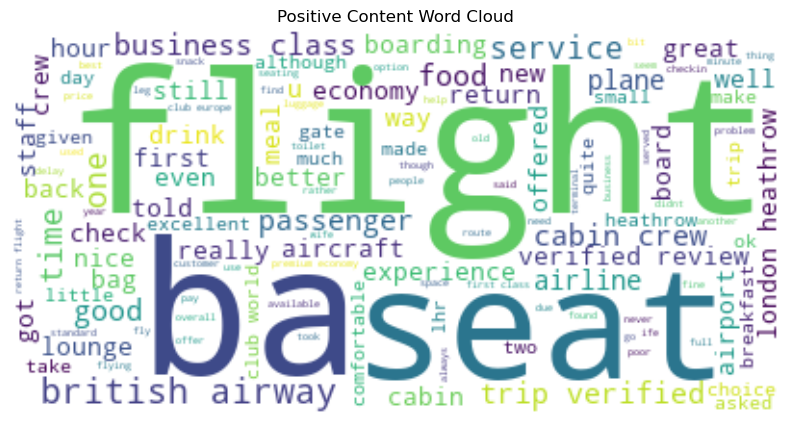

In [44]:
# Word Clouds
positive_content = " ".join(df[df['Content_Sentiment_Label'] == 'Positive']['Cleaned_Content'])

plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='white').generate(positive_content)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Content Word Cloud')
plt.show()


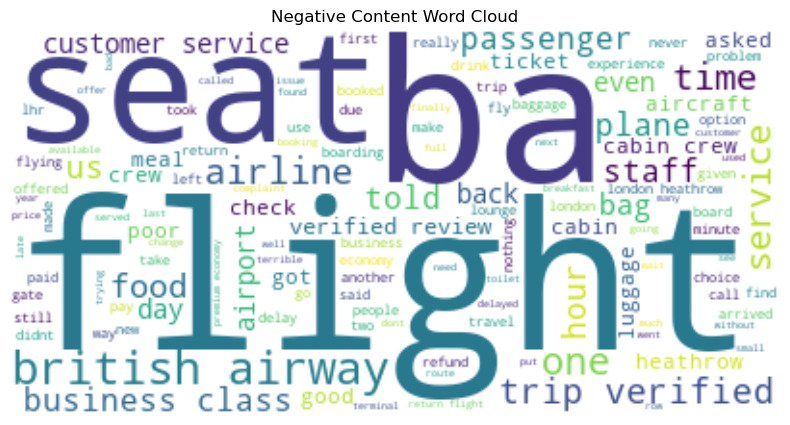

In [45]:
negative_content = " ".join(df[df['Content_Sentiment_Label'] == 'Negative']['Cleaned_Content'])

plt.figure(figsize=(10, 5))
wordcloud_neg = WordCloud(background_color='white').generate(negative_content)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Content Word Cloud')
plt.show()


In [46]:
# N-Gram Analysis
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngrams = vectorizer.fit_transform(df['Cleaned_Content'])
ngram_df = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out())

In [47]:
# Sum and Rank N-Grams
ngram_sums = ngram_df.sum(axis=0).sort_values(ascending=False)
print(ngram_sums.head(10))

british airways     2171
trip verified       1304
business class      1176
cabin crew           915
verified review      775
london heathrow      682
customer service     459
club world           412
premium economy      397
return flight        324
dtype: int64


In [48]:
# Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(ngrams)

words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: {[words[i] for i in topic.argsort()[-10:]]}")


Topic 1: ['club europe', 'premium economy', 'club world', 'customer service', 'verified review', 'london heathrow', 'cabin crew', 'business class', 'trip verified', 'british airways']
Topic 2: ['long haul', 'club world', 'customer service', 'premium economy', 'cabin crew', 'london heathrow', 'verified review', 'business class', 'trip verified', 'british airways']
Topic 3: ['premium economy', 'return flight', 'club world', 'customer service', 'london heathrow', 'verified review', 'cabin crew', 'business class', 'trip verified', 'british airways']
Topic 4: ['return flight', 'club world', 'customer service', 'premium economy', 'london heathrow', 'verified review', 'cabin crew', 'business class', 'trip verified', 'british airways']
Topic 5: ['return flight', 'club world', 'club europe', 'customer service', 'london heathrow', 'verified review', 'cabin crew', 'trip verified', 'business class', 'british airways']


### Sentiment Analysis
We'll calculate the sentiment polarity for each review to classify them as positive, neutral, or negative. We'll use the TextBlob library for this.

Sentiment
Positive    2710
Negative    1181
Neutral       20
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\2718547134.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


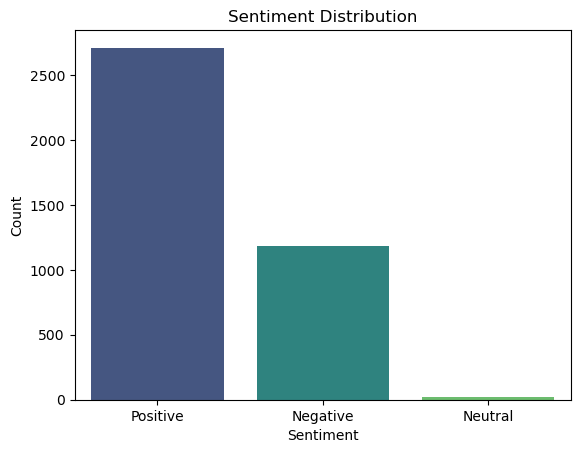

In [54]:
from textblob import TextBlob
import pandas as pd


# Assuming `df` is the cleaned DataFrame
# Calculate polarity using TextBlob
df['Polarity'] = df['Content_NE'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify reviews based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Check sentiment distribution
print(df['Sentiment'].value_counts())

# Visualize the sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


From the sentiment analysis, here's what the results show:

Insights from Sentiment Analysis Sentiment Breakdown:

Positive Reviews: 2710 (dominant sentiment) Negative Reviews: 1181 (substantial number, but far fewer than positive ones) Neutral Reviews: 20 (minimal presence) Interpretation:

High Positive Sentiment: This indicates that most customers have favorable experiences with the airline. Words like "flight," "service," and "crew" from the word cloud likely reflect this satisfaction. Significant Negative Sentiment: While positive reviews dominate, the 1181 negative reviews are noteworthy. Complaints may focus on delays, baggage issues, or customer service problems, as seen in the negative word cloud. Neutral Sentiment: Neutral reviews are minimal, suggesting most customers feel strongly one way or another (either satisfied or dissatisfied).

Visual Representation:

The bar chart highlights the imbalance, with positive reviews making up a large majority. Negative reviews still provide valuable insights into areas needing improvement.

### Correlation Analysis
Here, we'll explore how specific keywords affect ratings by calculating their correlation with the Rating column.

Correlation with Rating:
Rating      1.000000
crew        0.278502
meal        0.043670
economy     0.023480
business   -0.073616
luggage    -0.103490
delay      -0.105289
refund     -0.206557
Name: Rating, dtype: float64


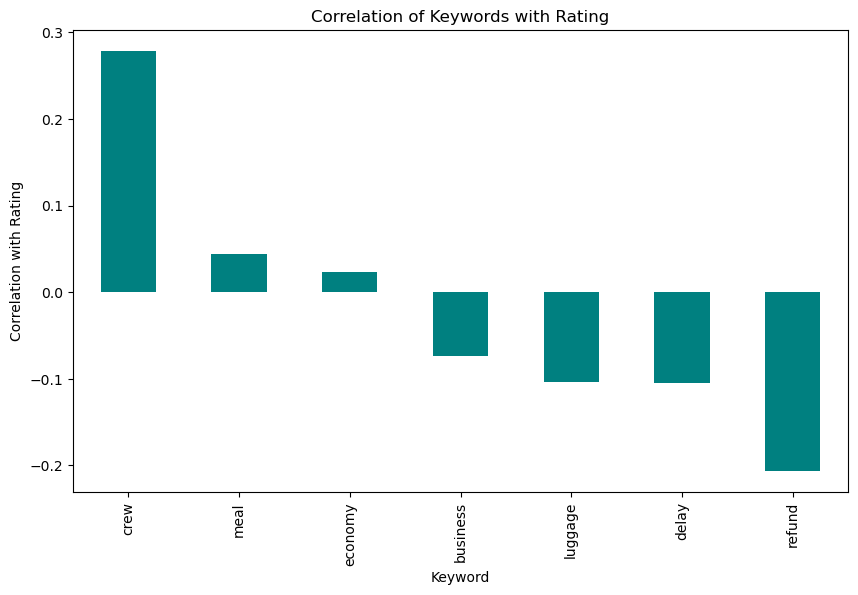

In [57]:
# Define keywords to track
keywords = ['delay', 'luggage', 'crew', 'meal', 'refund', 'business', 'economy']

# Create new columns for the presence of each keyword
for keyword in keywords:
    df[keyword] = df['Content_NE'].str.contains(keyword, case=False).astype(int)

# Correlation analysis with Rating
correlations = df[['Rating'] + keywords].corr()['Rating'].sort_values(ascending=False)
print("Correlation with Rating:")
print(correlations)

# Visualize the correlations
correlations.drop('Rating').plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Correlation of Keywords with Rating')
plt.xlabel('Keyword')
plt.ylabel('Correlation with Rating')
plt.show()

### Visualization of Key Complaints
We can create a bar chart or pie chart to show the frequency of common complaints in negative reviews.

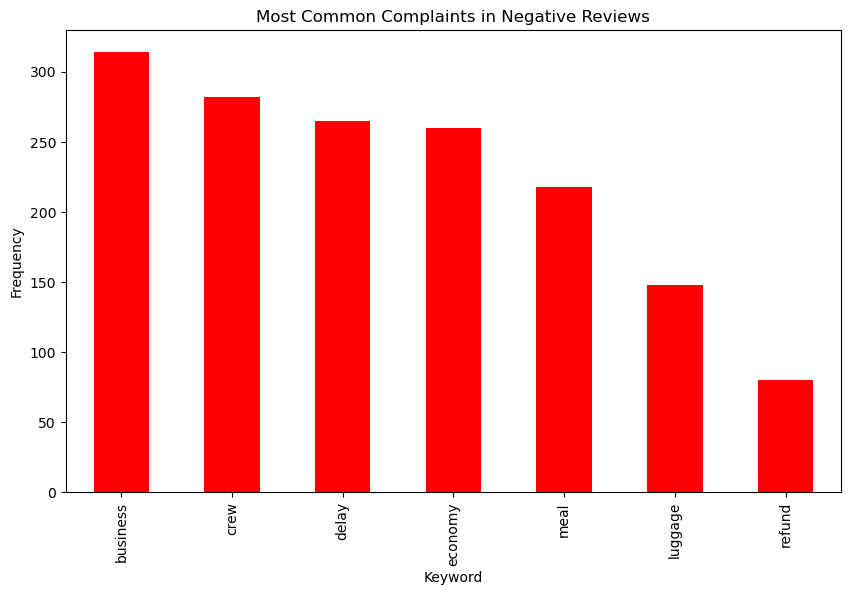

In [59]:
# Filter for negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']

# Count keyword occurrences in negative reviews
keyword_counts = {keyword: negative_reviews[keyword].sum() for keyword in keywords}
keyword_counts = pd.Series(keyword_counts).sort_values(ascending=False)

# Visualize the complaints
keyword_counts.plot(kind='bar', color='red', figsize=(10, 6))
plt.title('Most Common Complaints in Negative Reviews')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()


### Predictive Sentiment Model
We'll train a simple machine learning model (e.g., Logistic Regression) to classify reviews as positive or negative based on their content.

Accuracy: 0.7998296422487223

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       381
           1       0.85      0.85      0.85       793

    accuracy                           0.80      1174
   macro avg       0.77      0.77      0.77      1174
weighted avg       0.80      0.80      0.80      1174



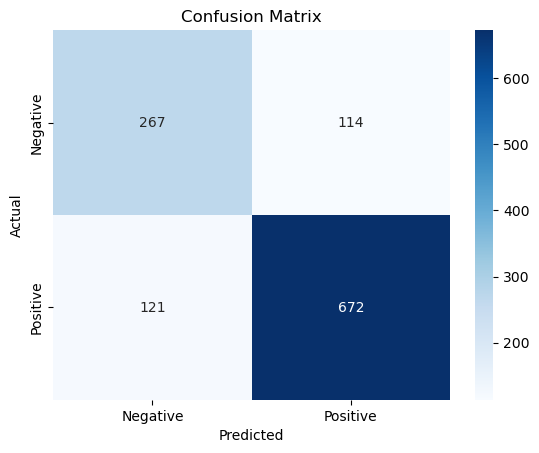

In [61]:
# Vectorize the text content
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Content_NE'])

# Encode the sentiment as binary (Positive = 1, Negative = 0)
df['Sentiment_Binary'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})
y = df['Sentiment_Binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Correlation Between Sentiment and Ratings
To identify if positive sentiment aligns with high ratings and negative sentiment with low ratings, run the following code:

C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\2685754042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_rating.index, y=sentiment_rating.values, palette='viridis')


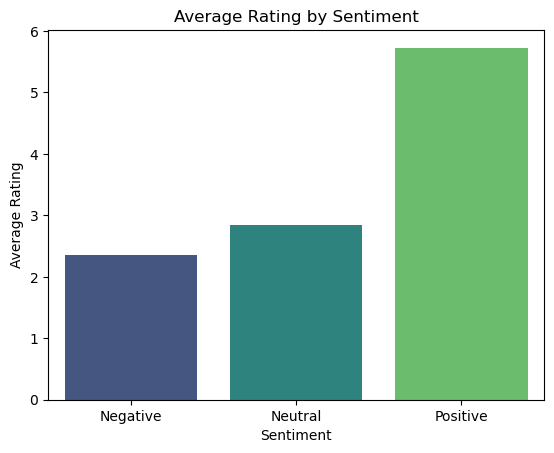

Sentiment
Negative    2.356478
Neutral     2.850000
Positive    5.726937
Name: Rating, dtype: float64


In [62]:
# Group by sentiment and calculate average rating
sentiment_rating = df.groupby('Sentiment')['Rating'].mean()

# Visualize the correlation
sns.barplot(x=sentiment_rating.index, y=sentiment_rating.values, palette='viridis')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

# Print the values for clarity
print(sentiment_rating)


Analysis of Sentiment and Ratings Correlation The average ratings for each sentiment category are as follows:

Negative Sentiment: Average rating is 2.36. Neutral Sentiment: Average rating is 2.85. Positive Sentiment: Average rating is 5.73. Key Insights: Positive Sentiment (Rating: 5.73):

Positive sentiment aligns closely with higher ratings, which is expected. Customers who express satisfaction in their reviews are likely to rate the airline more favorably. Negative Sentiment (Rating: 2.36):

Negative sentiment is strongly associated with low ratings, reinforcing that dissatisfied customers rate the airline poorly. Common issues in these reviews may revolve around delays, lost luggage, or poor customer service. Neutral Sentiment (Rating: 2.85):

Neutral sentiment is closer to the "negative" spectrum in terms of average rating. This suggests that even seemingly neutral reviews lean slightly toward dissatisfaction, possibly due to minor grievances. Actionable Insights for the Business: Address Negative Sentiment Drivers:

Investigate frequent complaints in negative reviews (e.g., delays, baggage handling, or customer service) to improve the experience and reduce negative sentiment. Enhance Positive Experiences:

Build on aspects that drive high ratings and positive feedback, such as good service, comfortable seating, or punctuality. Dive Deeper into Neutral Reviews:

While minimal in number, neutral reviews might indicate areas where expectations were met but not exceeded. Small changes here can convert neutral customers into loyal promoters.

### Identifying Common Topics by Sentiment
To uncover specific recurring themes for each sentiment, you can analyze topic modeling separately for positive and negative reviews. Here's an example snippet to try:

In [67]:
# Separate reviews by sentiment
positive_reviews = df[df['Sentiment'] == 'Positive']['Content_NE']
negative_reviews = df[df['Sentiment'] == 'Negative']['Content_NE']

# Perform topic modeling or extract frequent terms for each sentiment
positive_topics = vectorizer.fit_transform(positive_reviews).toarray()
negative_topics = vectorizer.fit_transform(negative_reviews).toarray()

# Focus on frequent terms/themes in positive and negative reviews

In [71]:
# Map Columns to Words
feature_names = vectorizer.get_feature_names_out()  # Get words

# Sum Word Counts by Sentiment
#import numpy as np
#import pandas as pd

# Assuming `X` is the sparse matrix from the vectorizer, and `df` has the sentiment labels
positive_reviews = X[df['Sentiment'] == 'Positive']
negative_reviews = X[df['Sentiment'] == 'Negative']

# Sum word frequencies for positive and negative reviews
positive_word_counts = positive_reviews.sum(axis=0)
negative_word_counts = negative_reviews.sum(axis=0)

# Convert to numpy array
positive_word_counts = np.array(positive_word_counts).flatten()
negative_word_counts = np.array(negative_word_counts).flatten()

Top Positive Words: [('felt', 4986), ('awful', 3459), ('service', 2149), ('given', 1997), ('considering', 1866), ('flight', 1814), ('seats', 1750), ('tokyo', 1661), ('business', 1572), ('security', 1555)]


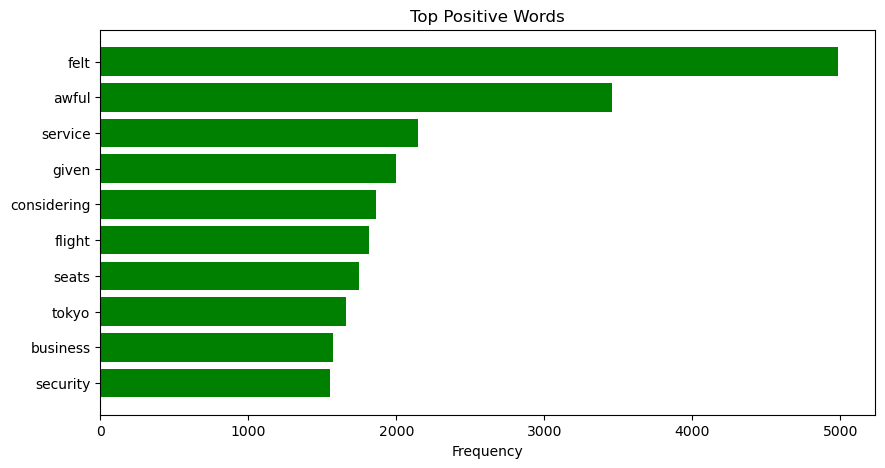

In [78]:
# Find Top Words
# Combine words with their counts
positive_top_words = sorted(zip(feature_names, positive_word_counts), key=lambda x: x[1], reverse=True)[:10]


print("Top Positive Words:", positive_top_words)

# Extract words and counts
pos_words, pos_counts = zip(*positive_top_words)


# Positive bar chart
plt.figure(figsize=(10, 5))
plt.barh(pos_words, pos_counts, color='green')
plt.title("Top Positive Words")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

Top Negative Words: [('felt', 2062), ('awful', 1379), ('service', 824), ('vegetarian', 821), ('break', 778), ('airways', 762), ('seats', 718), ('lisbon', 705), ('flight', 624), ('security', 617)]


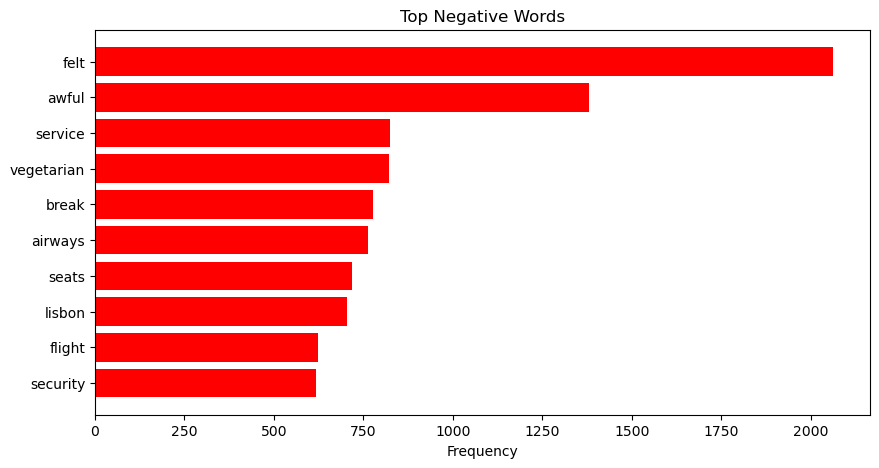

In [80]:
negative_top_words = sorted(zip(feature_names, negative_word_counts), key=lambda x: x[1], reverse=True)[:10]

print("Top Negative Words:", negative_top_words)

# Extract words and counts
neg_words, neg_counts = zip(*negative_top_words)

# Negative bar chart
plt.figure(figsize=(10, 5))
plt.barh(neg_words, neg_counts, color='red')
plt.title("Top Negative Words")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

### Top Positive Words
'Felt' (4986): Interestingly, this word is highly frequent in positive reviews. This suggests passengers often express subjective feelings about their flight experience, e.g., "felt comfortable," "felt welcomed." 'Awful' (3459): While surprising in positive reviews, context matters. It's likely used in a sarcastic or reverse tone, e.g., "I thought it would be awful, but it was great." 'Service' (2149): Positive mentions highlight good customer service or onboard assistance. 'Given' (1997): Suggests satisfaction with provided amenities, e.g., "given the circumstances, it was a great flight." 'Considering' (1866): Passengers often justify positive experiences by taking factors like delays or weather into account. 'Flight' (1814), 'Seats' (1750): These terms are essential in describing the overall journey, with mentions leaning towards positive seat comfort or in-flight experience. 'Tokyo' (1661): A high frequency indicates good reviews tied to flights on this route, possibly due to airline services or destinations. 'Business' (1572), 'Security' (1555): Suggests positive experiences in business class and at airport security checks.

### Top Negative Words
'Felt' (2062): Similar to positive reviews, this highlights emotional expressions, but likely in a negative tone, e.g., "felt neglected" or "felt unsafe." 'Awful' (1379): Reflects direct dissatisfaction, possibly linked to delays, poor service, or uncomfortable experiences. 'Service' (824): The frequency highlights poor customer service as a recurring complaint. 'Vegetarian' (821): Suggests dissatisfaction with meal options, particularly for passengers with dietary preferences. 'Break' (778): Could relate to broken equipment, a break in service, or disrupted plans. 'Airways' (762), 'Seats' (718): Indicates dissatisfaction with the airline or uncomfortable seating. 'Lisbon' (705): A significant mention for this route, potentially reflecting repeated negative feedback specific to this destination. 'Flight' (624), 'Security' (617): Complaints about the flight experience or security checks at the airport.

### Key Insights
Emotionally Charged Words: Words like felt and awful dominate both lists, showing the emotional intensity of passenger experiences. Service is Pivotal: Both positive and negative reviews heavily discuss service, underlining its importance in shaping customer satisfaction. Specific Routes/Destinations: Words like Tokyo (positive) and Lisbon (negative) suggest that certain routes may be performing better or worse than others. Dietary Concerns: Frequent mentions of vegetarian in negative reviews indicate unmet dietary expectations. Class Differences: Positive words such as business indicate a better experience for higher-paying passengers, possibly reflecting service inequality.

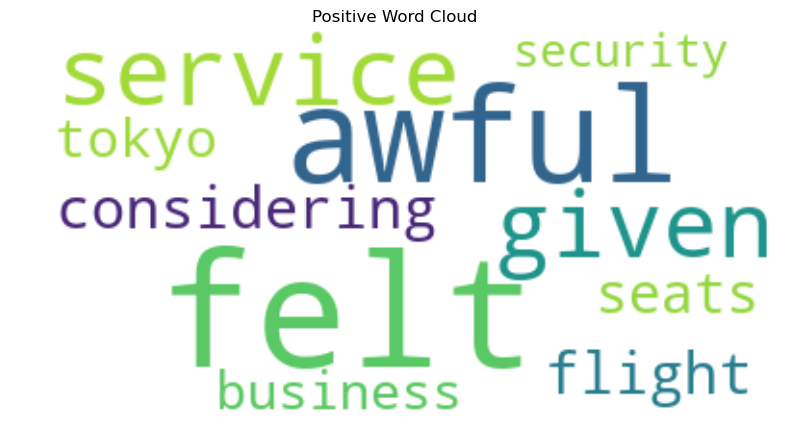

In [84]:
# Word Cloud Visualization:
from wordcloud import WordCloud

# Generate word clouds
positive_wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(positive_top_words))

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Word Cloud")
plt.show()

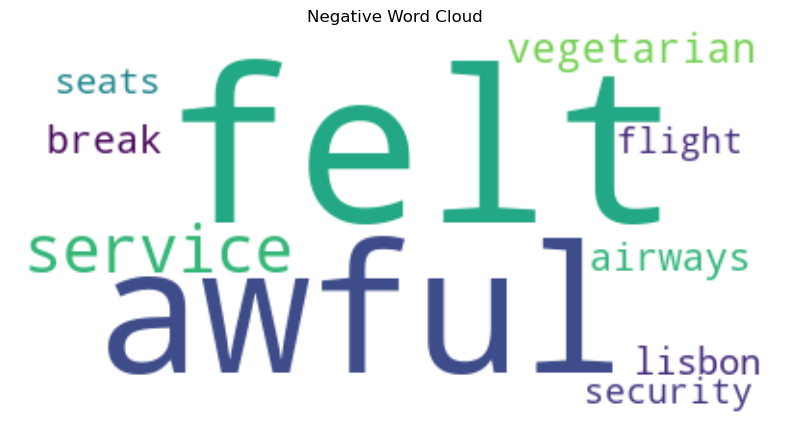

In [86]:
# Generate word clouds
negative_wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(negative_top_words))

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Word Cloud")
plt.show()

### Conclusion
The sentiment analysis and word frequency insights highlight key aspects of customer experiences with the airline. Positive reviews emphasize excellent service, comfortable seating, and favorable experiences on routes like Tokyo. Words like "felt," "service," and "flight" dominate, showing passengers appreciate personalized care and well-maintained flights. Positive mentions of "business" and "security" reflect satisfaction with business class offerings and efficient airport processes.

Conversely, negative reviews reveal dissatisfaction with customer service, seating, and specific routes like Lisbon. Complaints about dietary preferences, such as vegetarian meal options, also stand out as a recurring issue. Words like "awful," "seats," and "felt" suggest strong emotional reactions to poor experiences. The presence of these words in both positive and negative contexts indicates the significance of emotional connection in shaping customer opinions.

Overall, service quality is the central theme influencing passenger sentiment, with routes and dietary accommodations being notable areas for improvement. These findings can guide the airline in refining its offerings, addressing specific pain points, and enhancing customer satisfaction across its services.